In [1]:
%


ans =

    '9.7.0.1296695 (R2019b) Update 4'



# Direction fields

For low-dimensional systems, there is a graphical tool known as a **direction field** that aids with estimating the behavior of solutions. 

## Scalar equations

In the scalar equation $x'=f(t,x)$, $f$ gives the slope of any solution at any point in the $(t,x)$ plane. Hence, while it is usually not easy to draw solution curves, it is straightforward to draw the instantaneous slopes of them. We give MATLAB code for it here.

::::{toggle}
:::{code-block} matlab
function dirfield(varargin)
% DIRFIELD Plot a direction field.
%    DIRFIELD(F,TLIM,XLIM) plots arrows in the (t,x) plane that represent
%    the slope field of the ODE dydt = F(t,y). The function F must accept
%    both arguments. The vectors TLIM and XLIM define the bounds of the 
%    plot in their respective directions.
%
%    DIRFIELD(F,G,XLIM,YLIM) plots arrows in the (x,y) plane that
%    represent the slope field of the ODE system 
% 
%       dx/dt = f(x,y),  dy/dt = g(x,y). 
%
%    Functions F and G must accept (x,y) as arguments. The vectors XLIM and
%    YLIM define the bounds of the plot in their respective directions.
%
%    If an additional input argument is present at the end, the direction
%    vectors are all normalized to have unit length, so speed information
%    is taken out of the picture. This might be better when some arrows
%    would otherwise get too small.
%
%    Examples:
%
%       dirfield(@(t,y) y,[0 3],[-1 1])
%
%       dirfield(@(t,y) t^2-y,[0 2],[-1 1])
%
%       f = @(x,y) 3*x - x*y/2;
%       g = @(x,y) -y + x*y/4;
%       dirfield(f,g,[0 10],[0 12])
%
%    See also QUIVER.

% Copyright 2021 by Toby Driscoll. Free for non-commercial use. 

[f,g] = varargin{1:2};
if isnumeric(g)    % y'=f(t,y)
    xlim = g;
    ylim = varargin{3};
    denorm = (nargin > 3);
    drawfield(@(x,y) 1,f,xlim,ylim,denorm)
    xlabel t, ylabel y
    title(['Slope field for y''=', func2str(f)])

else               % x'=f(x,y), y'=g(x,y)
    [xlim,ylim] = varargin{3:4};
    denorm = (nargin > 4);
    drawfield(f,g,xlim,ylim,denorm)
    xlabel x, ylabel y
    title(['Direction field for x''=',func2str(f),', y''=', func2str(g)])
end
end

function drawfield(dxdt,dydt,xlim,ylim,denorm)

% Set up grid in (x,y) plane 
x = linspace(xlim(1),xlim(2),25);
y = linspace(ylim(1),ylim(2),25);
[X,Y] = meshgrid(x,y);

% This is safer than assuming the user vectorizes the inputs.
U = zeros(size(X));  V = U;
for i = 1:numel(X)
    U(i) = dxdt(X(i),Y(i));  V(i) = dydt(X(i),Y(i));
end

if denorm 
    U = U./sqrt(U.^2+V.^2);  V = V./sqrt(U.^2+V.^2);
end

% Make the plot and pretty it up
quiver(X,Y,U,V)
axis tight

end
:::
::::


For instance, the logistic equation $x'=ax-bx^2$ can be visualized for $a=3$, $b=2$ via

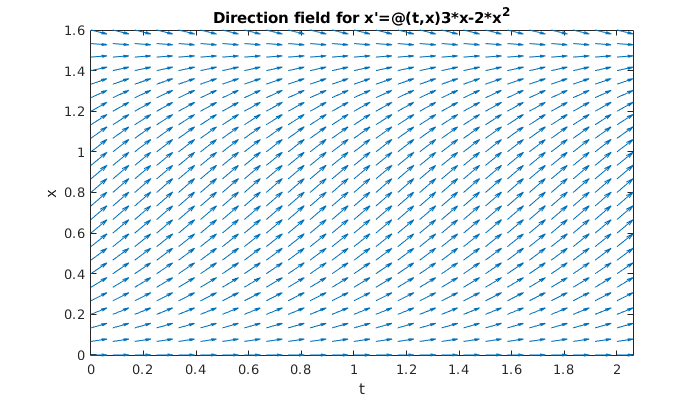

In [2]:
f = @(t,x) 3*x-2*x^2;
dirfield(f,[0 2],[0 1.6])

Since the logistic equation is autonomous, the picture is the same along every vertical line. Here you can clearly see the instability of $\hat{x}=0$ and asymptotic stability of $\hat{x}=K=1.5$. 

Here is a direction field for $x'=t-x^2$. Note that the arrows are horizontal along the sideways parabola $t=x^2$, because that is where the slope is zero.

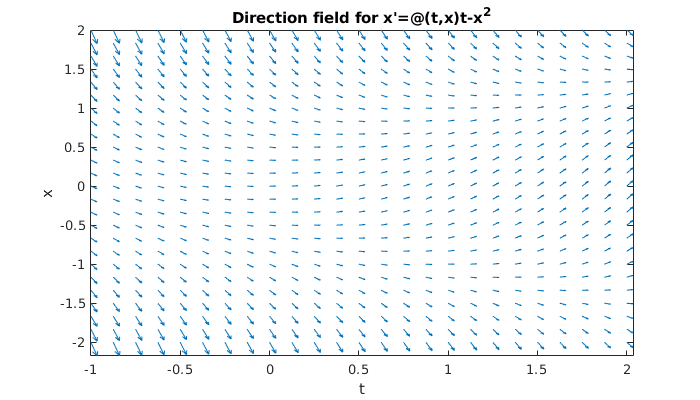

In [3]:
f = @(t,x) t-x^2;
dirfield(f,[-1 2],[-2 2])

## Autonomous 2D equations

An autonomous system in two dimensions has the particular form 

\begin{align*}
	\dd{x_1}{t} & = f_1(x_1,x_2), \\
	\dd{x_2}{t} & = f_2(x_1,x_2), \\
\end{align*}

or, if we prefer to name $x_1$ and $x_2$ as $x$ and $y$,

\begin{align*}
	\dd{x}{t} & = F(x,y), \\
	\dd{y}{t} & = G(x,y). \\
\end{align*}

In this case we interpret a solution $[x(t),y(t)]$ as a curve in the $x-y$ plane parameterized by $t$. The tangent vector to this curve is

$$
\bigl[ x'(t),y'(t) \bigr] = \bigl[ F(x,y), G(x,y) \bigr].
$$

This quantity can be drawn as a vector field in the $x-y$ plane, without knowing the solution.


For instance, here is a direction field for the linear ODE system

\begin{align*}
\dd{x}{t} & = -y,\\
\dd{y}{t} & = x.
\end{align*}

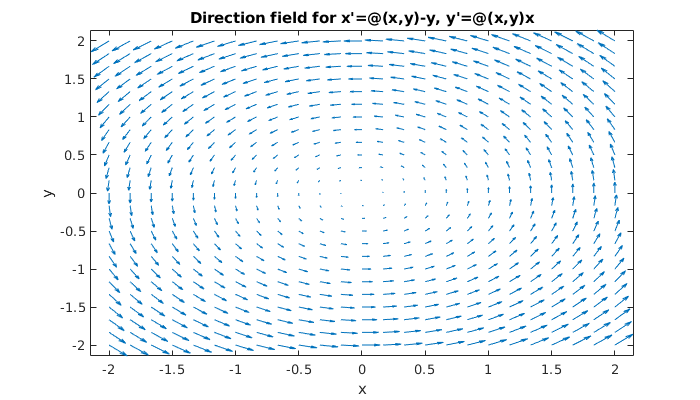

In [4]:
F = @(x,y) -y;   G = @(x,y) x;
dirfield(F,G,[-2 2],[-2 2])

Based on this picture, we should expect to see solutions circulating around the origin. In fact, this system is $\bfx'=\bfA\bfx$ with matrix $\bfA=\twomat{0}{-1}{1}{0}$, and the origin is a center.

Here is a slope field in the first quadrant for the nonlinear system

\begin{align*}
\dd{x}{t} & = 3x - \frac{1}{2} x y,\\
\dd{y}{t} & = \frac{1}{4} x y - y.
\end{align*}

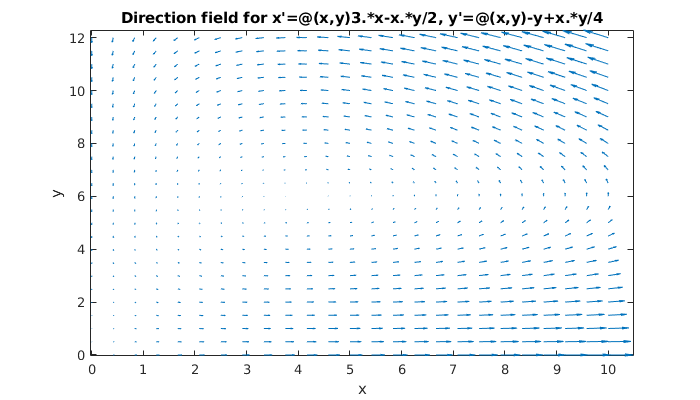

In [5]:
F = @(x,y) 3.*x-x.*y/2;
G = @(x,y) -y + x.*y/4;

dirfield(F,G,[0 10],[0 12])

<div style="max-width:608px"><div style="position:relative;padding-bottom:66.118421052632%"><iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2358381/sp/235838100/embedIframeJs/uiconf_id/43030021/partner_id/2358381?iframeembed=true&playerId=kaltura_player&entry_id=1_4ygi3a2x&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=1_4qd6fdja" width="608" height="402" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player" style="position:absolute;top:0;left:0;width:100%;height:100%"></iframe></div></div>